In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')

In [3]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

In [5]:
m, n = data.shape
print(data.shape)
print(np.count_nonzero(np.isnan(data)))

(372450, 785)
0


In [6]:
np.random.shuffle(data)
#Seperate into training and testing once shuffled

#leave 1000 for testing
test_data = data[0:1000].T
test_Y = test_data[0]
test_X = test_data[1:n]
test_X = test_X / 255

#rest is for training
train_data = data[1000:m].T
train_Y = train_data[0]
train_X = train_data[1:n]
train_X = train_X / 255

In [7]:
print(train_X.shape)
print(train_Y.shape)

(784, 371450)
(371450,)


In [8]:
def init():
    #X -> (784, 371450)
    #Hidden Layer Depth of 20(trust), 26 output nodes
    W1 = np.random.rand(20, 784) - 0.5
    #X -> (20, 371450)
    B1 = np.random.rand(20, 1) - 0.5
    #X -> (20, 371450)
    W2 = np.random.rand(26, 20) - 0.5
    #X -> (26, 371450)
    B2 = np.random.rand(26, 1) - 0.5
    #X -> (26, 371450)
    return W1, B1, W2, B2
def softmax(X):
    A = np.exp(X) / sum(np.exp(X))
    return A
def leaky_relu(X):
    #leaky relu with alpha set as 0.01
    return np.maximum(0.01 * X, X)
def rev_relu(Z):
    #derivative of leaky relu function
    alpha = 0.01
    return np.where(Z>0, 1, alpha)

def forward(X, W1, B1, W2, B2):
    Z1 = W1.dot(X) + B1
    A1 = leaky_relu(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward(X, Y, W1, B1, W2, B2, Z1, A1, Z2, A2, LR):
    #Calculate derivatives
    labels = one_hot(Y)
    dz2 = A2 - labels
    dw2 = (1 / m) * dz2.dot(A1.T)
    db2 = (1 / m) * np.sum(dz2)
    dz1 = W2.T.dot(dz2) * rev_relu(Z1)
    dw1 = (1 / m) * dz1.dot(X.T)
    db1 = (1 / m) * np.sum(dz1)
    
    #Update weights/biases
    W1 = W1 - (LR * dw1)
    B1 = B1 - (LR * db1)
    W2 = W2 - (LR * dw2)
    B2 = B2 - (LR * db2)
    
    #return new weights/biases
    return W1, B1, W2, B2

def learn(epochRate, X, Y, LR):
    W1, B1, W2, B2 = init()
    for i in range(epochRate):
        Z1, A1, Z2, A2 = forward(X, W1, B1, W2, B2)
        W1, B1, W2, B2 = backward(X, Y, W1, B1, W2, B2, Z1, A1, Z2, A2, LR)
        if (i % (0.1 * epochRate) == 0):
            print(f"Epoch {i} Completed.")
    return W1, B1, W2, B2

In [9]:
W1, B1, W2, B2 = learn(1000, train_X, train_Y, 1)

Epoch 0 Completed.
Epoch 100 Completed.
Epoch 200 Completed.
Epoch 300 Completed.
Epoch 400 Completed.
Epoch 500 Completed.
Epoch 600 Completed.
Epoch 700 Completed.
Epoch 800 Completed.
Epoch 900 Completed.


In [10]:
#To show training
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    #get accuracy
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions
def test_prediction(index, W1, b1, W2, b2):
    current_image = train_X[:, index, None]
    prediction = make_predictions(train_X[:, index, None], W1, b1, W2, b2)
    label = train_Y[index]
    #Convert number to letter
    p = chr(65 + prediction[0])
    l = chr(65 + label)
    print("Prediction: ", p)
    print("Label: ", l)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  O
Label:  O


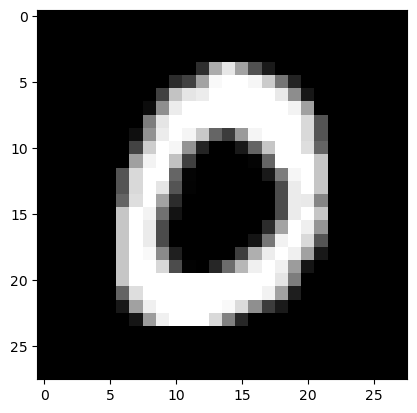

In [11]:
test_prediction(3, W1, B1, W2, B2)

In [12]:
dev_predictions = make_predictions(test_X, W1, B1, W2, B2)
get_accuracy(dev_predictions, test_Y)

[23 19 13 13 18 19 10 18 18 18  2 15 15 12 25 11 14  2 20 18  1 18 23 18
 14 18 19 17 12 11  9 12 18  7 13 16  6  0 18  2 18 14  3 19 18 14  0  2
  1 18 14  0 22 24 13 17  2 17 14 18  2 24 14 14  4 14 25 16  2 14 14 18
 20 18 24 24 18  2  7  2 19 14  4 14  9 10  7 23 20 19 12 18  2 20 13 23
 15 14 13 18 17 12 22 18 20 20  2 14 13 14 14 18 18 18 17 14  4 14 25 18
 13  4 23 20 14 18 19 13  2 24 14 20 20  0  7  8 18 15  4 20  2 14 18  2
 18  2 13 24  2 13 18 14 10  9 18 12  2 17 13 14  2  9  4  1 14 18 18 19
 14 18  3 19  0  2 19  3 20  2  2  2 24 11  2  1 13  2 18 16 14 15 14 14
 17 14 20  2 13 14  0 14 14 17 19 18 11 23 14 12  4 19 19 20 18 14 14 20
 14 13 18 20 11  2 18 16  4 17 10 21 20 20 25  6 16 12 19 14 10 10  0 18
 12 14 20 20 12 12 10  9 14 12 20 18 14 18  0  0 18 18 14 17 10 14 20  0
  2 13 20  3 20 18 18 13 15 14 13  2 20 13 20  0 20 15  2 14 12 14 14 18
  2 14  1 18 20 24 18 20 18 14  9 15 24 13 20 24 24 15 15  2 14 20  1  4
 15 14 15 15  2 11 20 16 20 13  1 15 19 14 13 14 22

0.849

About 87% accuracy on test data.


Decent for a 2 layer Network. (1 hidden Layer, depth of 20)